In [9]:
from nilearn import plotting
from nilearn import datasets
from scipy import stats
import nibabel as nb
import numpy as np
%matplotlib inline

In [4]:
# Retrieve the NKI data
nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)

# NKI resting state data set of one subject left hemisphere in fsaverage5 space
resting_state = nki_dataset['func_left'][0]

In [6]:
# Destrieux parcellation left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = nb.freesurfer.read_annot(destrieux_atlas['annot_left'])

In [5]:
# Retrieve fsaverage data
fsaverage = datasets.fetch_surf_fsaverage5()

# Fsaverage5 left hemisphere surface mesh files
fsaverage5_pial = fsaverage['pial_left'][0]
fsaverage5_inflated = fsaverage['infl_left'][0]
sulcal_depth_map = fsaverage['sulc_left'][0]

In [7]:
# Load resting state time series and parcellation
timeseries = plotting.surf_plotting.check_surf_data(resting_state)

# Extract seed region: dorsal posterior cingulate gyrus
region = 'G_cingul-Post-dorsal'
labels = np.where(parcellation[0] == parcellation[2].index(region))[0]

# Extract time series from seed region
seed_timeseries = np.mean(timeseries[labels], axis=0)

# Calculate Pearson product-moment correlation coefficient between seed
# time series and timeseries of all cortical nodes of the hemisphere
stat_map = np.zeros(timeseries.shape[0])
for i in range(timeseries.shape[0]):
    stat_map[i] = stats.pearsonr(seed_timeseries, timeseries[i])[0]

# Re-mask previously masked nodes (medial wall)
stat_map[np.where(np.mean(timeseries, axis=1) == 0)] = 0

/usr/lib/python2.7/site-packages/scipy/stats/stats.py:2975: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


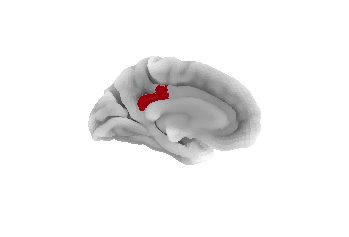

In [12]:
# Display ROI on surface
plotting.plot_surf_roi(fsaverage5_pial, roi_map=labels, hemi='left',
                       view='medial', bg_map=sulcal_depth_map, bg_on_data=True)

plotting.show()

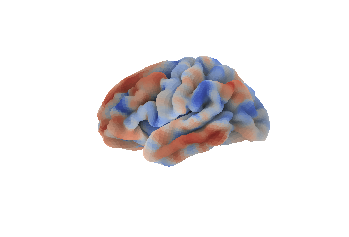

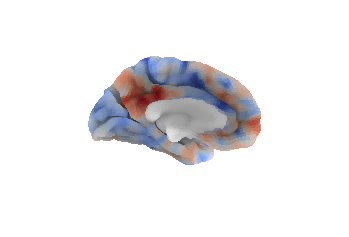

In [13]:
# Display unthresholded stat map in lateral and medial view
# dimmed background
plotting.plot_surf_stat_map(fsaverage5_pial, stat_map=stat_map, hemi='left',
                            bg_map=sulcal_depth_map, bg_on_data=True,
                            darkness=.5)
plotting.plot_surf_stat_map(fsaverage5_pial, stat_map=stat_map, hemi='left',
                            view='medial', bg_map=sulcal_depth_map,
                            bg_on_data=True, darkness=.5)

plotting.show()

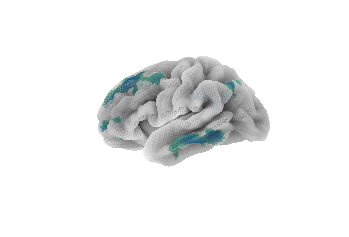

In [14]:
# Displaying a thresholded stat map with a different colormap and transparency
plotting.plot_surf_stat_map(fsaverage5_pial, stat_map=stat_map, hemi='left',
                            bg_map=sulcal_depth_map, bg_on_data=True,
                            cmap='Spectral', threshold=.6, alpha=.5)

plotting.show()